# Plotting and SunPy

## Useful Links

1. [SunPy Map Documentation](http://docs.sunpy.org/en/stable/guide/data_types/maps.html)
1. [Submaps and Cropping Example](http://docs.sunpy.org/en/stable/generated/gallery/gallery/submaps_and_cropping.html)

## Working with solar data

The core of SunPy's functionality is that it provides three objects for dealing with solar data types: `Map` for solar image data, `Lightcurve` for time-series data and `Spectra` for spectral data. Today we'll be focusing exclusively on `Map`, which is the most used and most developed, but it is worth being aware that the others exist should you need them.

SunPy also provides several sample data files, which need to be manually downloaded. For this example we'll use the sample AIA 17.1nm image.

In [7]:
# Import statements
import sunpy.map
from sunpy.data import download_sample_data

# This is needed to download the sample data
#download_sample_data()

Once the sample data has been downloaded, you can import the `AIA_171_IMAGE` variable. Notice that this is not the image itself, but a string corresponding to the location of the image on disk. A `Map` object is created by passing `Map()` the filename of a valid fits image file, such as the one defined in `AIA_171_IMAGE`.

In [2]:
from sunpy.data.sample import AIA_171_IMAGE

print(AIA_171_IMAGE)
mymap = sunpy.map.Map(AIA_171_IMAGE)

print(mymap)

/home/drew/sunpy/data/sample_data/AIA20110319_105400_0171.fits
[[ 0.3125 -0.0625 -0.125  ...,  0.625  -0.625   0.    ]
 [ 1.      0.1875 -0.8125 ...,  0.625  -0.625   0.    ]
 [-1.1875  0.375  -0.5    ..., -0.125  -0.625  -1.1875]
 ..., 
 [-0.625   0.0625 -0.3125 ...,  0.125   0.125   0.125 ]
 [ 0.5625  0.0625  0.5625 ..., -0.0625 -0.0625  0.    ]
 [ 0.5    -0.125   0.4375 ...,  0.6875  0.6875  0.6875]]


The two most important attributes of this new variable are `mymap.data`, which contains an array of the pixel values of the image, and `mymap.meta`, which contains the header information. Both of these are loaded from the specified file.

In [3]:
print(mymap.data)
print(mymap.meta)

[[ 0.3125 -0.0625 -0.125  ...,  0.625  -0.625   0.    ]
 [ 1.      0.1875 -0.8125 ...,  0.625  -0.625   0.    ]
 [-1.1875  0.375  -0.5    ..., -0.125  -0.625  -1.1875]
 ..., 
 [-0.625   0.0625 -0.3125 ...,  0.125   0.125   0.125 ]
 [ 0.5625  0.0625  0.5625 ..., -0.0625 -0.0625  0.    ]
 [ 0.5    -0.125   0.4375 ...,  0.6875  0.6875  0.6875]]
MapMeta([('simple', True), ('bitpix', 32), ('naxis', 2), ('naxis1', 1024), ('naxis2', 1024), ('extend', True), ('comment', "FITS (Flexible Image Transport System) format is defined in 'Astronomy  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H"), ('origin', 'SDO/JSOC-SDP'), ('date', '2011-03-19T11:08:25'), ('telescop', 'SDO/AIA'), ('instrume', 'AIA_3'), ('date-obs', '2011-03-19T10:54:00.34'), ('t_obs', '2011-03-19T10:54:01.34Z'), ('tobsstep', 90.0), ('tobsepoc', '1977.01.01_00:00:00_TAI'), ('camera', 3), ('img_type', 'LIGHT'), ('exptime', 1.999601), ('expsdev', 0.00016), ('int_time', 2.273438), ('wavelnth', 171), ('waveunit', 

`Map` has many other attributes and methods that provide information about the image. Many of these make information from the header more readily available, so in practice you should not often have to deal with `Map.meta` directly.

In [4]:
print(mymap.mean())
print(mymap.date)
print(mymap.coordinate_system)

235.915314436
2011-03-19 10:54:00.340000
Pair(x='HPLN-TAN', y='HPLT-TAN')


Now let's get back to displaying data. There are two methods for plotting and displaying a `Map`. The first is `peek()`. This method is quick and easy to use, and automatically does a few things to make the plot look nice - it adds a title, sensible axes labels, a colourbar and a coordinate grid.

<IPython.core.display.Javascript object>


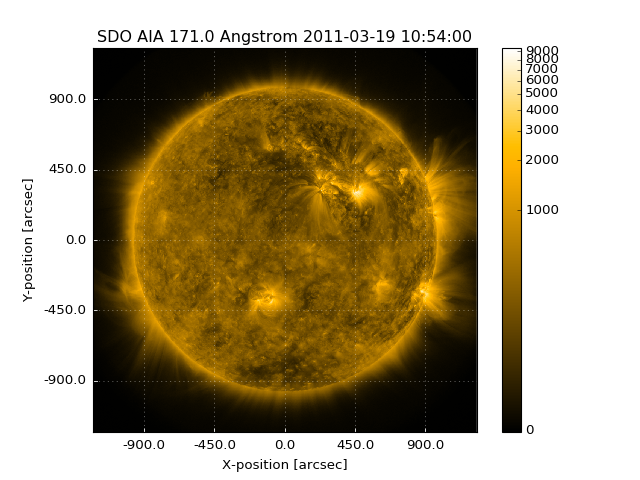

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook

mymap.peek()

This is useful for quickly inspecting data, but can't really be customised much past this stage, so it isn't very flexible.

The other plotting method, `plot()`, produces a very slightly simpler plot by default:

<IPython.core.display.Javascript object>


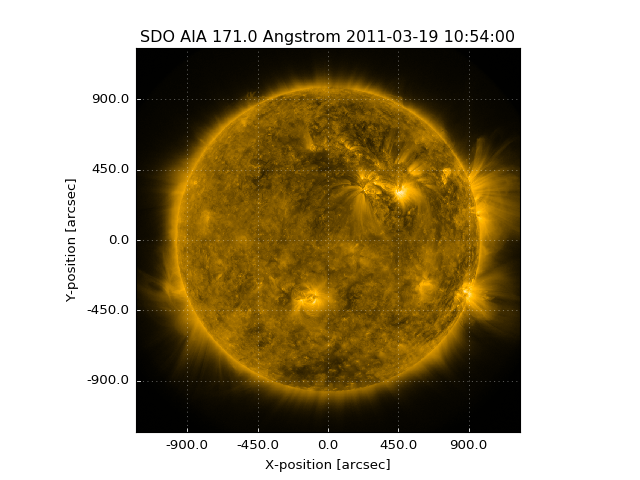

In [9]:
fig = plt.figure()
mymap.plot()
plt.show()

But the advantage of using this method is that it provides a plot that can be customised in many of the same ways as a normal line or image plot. This can be done with various functions in `pyplot`, and by passing keyword arguments to the `plot()` function.

<IPython.core.display.Javascript object>


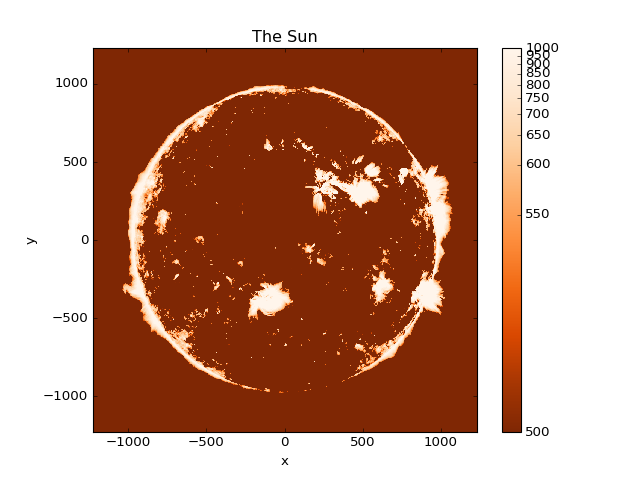

/home/drew/anaconda3/lib/python3.5/site-packages/sunpy/map/mapbase.py:1593: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)


In [20]:
fig, ax = plt.subplots()
mymap.plot(vmin=500, vmax=1000)
ax.set_title('The Sun')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.set_cmap('Oranges_r')
plt.colorbar()
plt.show()

### Submaps

`Map`s have the very useful functionality of being croppable. Using the `submap` method, you can crop a `Map` to specified coordinates, creating a new map with an updated header. This means all the attributes of the new `Map` are correct for the newly cropped data, so you never need to worry about updating it yourself.

235.915314436 2011-03-19 10:54:00.340000 [-1227.6  1230. ] arcsec
1008.82758713 2011-03-19 10:54:00.340000 [-197.99999254    1.20000746] arcsec


<IPython.core.display.Javascript object>


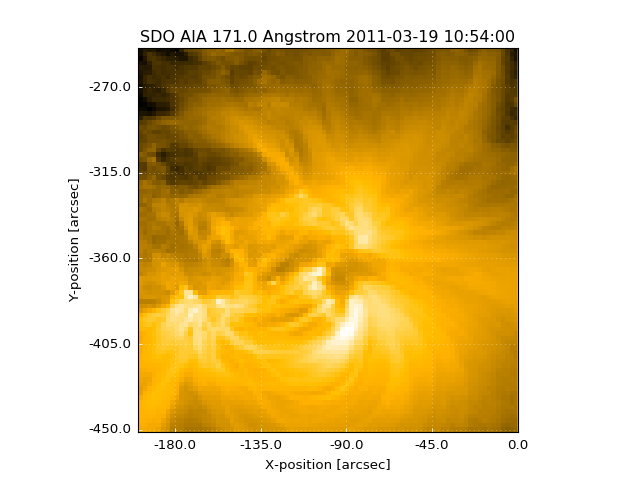

In [21]:
# We'll use astropy units to demonstrate submapping
import astropy.units as u

# Check some information about the Map first.
print(mymap.mean(), mymap.date, mymap.xrange)

# Crop the Map and store the new one in another variable.
smap = mymap.submap([-200, 0]*u.arcsec, [-450, -250]*u.arcsec)

# Check the same information again
print(smap.mean(), smap.date, smap.xrange)

# Have a look
smap.plot()
plt.show()

## Challenge: Putting it all together

1. Plot the sample AIA 17.1nm image, next to a submap of some interesting feature. Give both plots a colourbar and change the titles. 
1. Plot a black cross at the same point on both images.
1. Plot a rectangle on the full `Map` which corresponds to the edges of the submap.

**Hints:**
- You can specify an axes to draw on by passing it into `plot()`, like this: `mymap.plot(axes=ax)`
- `Map` has a `draw_rectangle()` method.
- `matplotlib` can be fussy about astropy units - you'll often have to use just the value of a Quantity in order for the plotting functions to work properly.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

mymap.plot(axes=ax[0]) # Plot the full Map
plt.title('Full sun') # Change the title
plt.colorbar() # Show a colour bar
plt.plot(-85, -380, marker='x', color='black') # Plot a single point with a black cross
# Plotting a line over a Map messes up the axes limits and they have to be reset
plt.xlim(mymap.xrange.value)
plt.ylim(mymap.yrange.value)
# Define the bottom-left corner, width and height of a rectangle from the ranges of the submap
corner = [smap.xrange[0].value, smap.yrange[0].value] * u.arcsec
width = smap.xrange[1] - smap.xrange[0]
height = smap.yrange[1] - smap.yrange[0]
mymap.draw_rectangle(corner, width, height) # Draw the rectangle

# Same again on the right
smap.plot(axes=ax[1])
plt.title('Active region')
plt.colorbar()
plt.plot(-85, -380, 'bx')
plt.xlim(smap.xrange.value)
plt.ylim(smap.yrange.value)

plt.show()